# CRISP-DM Data Science Notebook Template

## 1. Project Overview
- Basic project information
- Initial setup with common data science libraries


In [71]:
import duckdb
import polars as pl
import missingno as msno

In [87]:
pl.Config.set_tbl_rows(100)
pl.Config.set_tbl_cols(100)
pl.Config.set_fmt_str_lengths(500)
pl.Config.set_tbl_width_chars(200)

polars.config.Config

In [53]:
# Import jupysql Jupyter extension to create SQL cells
%reload_ext sql
%load_ext sql
con = duckdb.connect()
%sql con --alias duckdb


# Read CSV with Polars
df = pl.read_csv("./data/Motor_Vehicle_Collisions_-_Crashes_20250309.csv")
df = df.select([
    pl.col(col).alias(col.lower().replace(" ", "_"))
    for col in df.columns
])

con.execute("DROP TABLE IF EXISTS crashes")  # Clear any existing table
con.execute("CREATE TABLE crashes AS SELECT * FROM df")

%config SqlMagic.displaylimit = 50

%sql --connections


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


current,url,alias
*,None,duckdb
,duckdb:///:memory:,duckdb:///:memory:


## 2. Business Understanding
**Goal:** Define the problem and business objectives.
- What is the problem we’re solving?
- What are the business goals and success criteria?
- Who are the stakeholders?
- Business objectives
- Situation assessment
- Data mining goals
- Project plan

## 3. Data Understanding
**Goal:** Explore and assess the data.
- What data is available
- Where does the come from?
- Data collection, description, and quality verification
- Initial data exploration (size, structure, missing values, distributions)
- Placeholder code for basic EDA

In [54]:
%%sql
SELECT *
FROM crashes
LIMIT 5;

Running query in 'duckdb'

crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
09/11/2021,2:39,None,None,None,None,None,WHITESTONE EXPRESSWAY,20 AVENUE,None,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
03/26/2022,11:45,None,None,None,None,None,QUEENSBORO BRIDGE UPPER,None,None,1,0,0,0,0,0,1,0,Pavement Slippery,None,None,None,None,4513547,Sedan,None,None,None,None
11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,None,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
06/29/2022,6:55,None,None,None,None,None,THROGS NECK BRIDGE,None,None,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
09/21/2022,13:21,None,None,None,None,None,BROOKLYN BRIDGE,None,None,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None


In [55]:
%%sql
DESCRIBE crashes;

Running query in 'duckdb'

column_name,column_type,null,key,default,extra
crash_date,VARCHAR,YES,None,None,None
crash_time,VARCHAR,YES,None,None,None
borough,VARCHAR,YES,None,None,None
zip_code,BIGINT,YES,None,None,None
latitude,DOUBLE,YES,None,None,None
longitude,DOUBLE,YES,None,None,None
location,VARCHAR,YES,None,None,None
on_street_name,VARCHAR,YES,None,None,None
cross_street_name,VARCHAR,YES,None,None,None
off_street_name,VARCHAR,YES,None,None,None


In [69]:
df.shape

(2160084, 29)

In [68]:
df.describe()

statistic,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
str,str,str,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str
"""count""","""2160084""","""2160084""","""1491739""",1.491428e6,1.920351e6,1.920351e6,"""1920351""","""1695123""","""1336187""","""372588""",2.160066e6,2.160053e6,2.160084e6,2.160084e6,2.160084e6,2.160084e6,2.160084e6,2.160084e6,"""2152670""","""1817856""","""155764""","""35467""","""9683""",2.160084e6,"""2144923""","""1734657""","""149866""","""34195""","""9383"""
"""null_count""","""0""","""0""","""668345""",668656.0,239733.0,239733.0,"""239733""","""464961""","""823897""","""1787496""",18.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,"""7414""","""342228""","""2004320""","""2124617""","""2150401""",0.0,"""15161""","""425427""","""2010218""","""2125889""","""2150701"""
"""mean""",null,null,null,10843.269566,40.615108,-73.729231,null,null,null,null,0.320827,0.001551,0.058508,0.000768,0.027986,0.000122,0.230069,0.000634,null,null,null,null,null,3.2221e6,null,null,null,null,null
"""std""",null,null,null,553.098903,2.104142,3.935312,null,null,null,null,0.708916,0.041543,0.247922,0.028257,0.167058,0.011075,0.670101,0.027522,null,null,null,null,null,1.5075e6,null,null,null,null,null
"""min""","""01/01/2013""","""0:00""","""BRONX""",10000.0,0.0,-201.35999,"""(0.0, 0.0)""",""" …",""" …",""" …",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""1""","""1""","""1""","""Accelerator Defective""","""Aggressive Driving/Road Rage""",22.0,"""''lime mope""","""(ceme""","""2 dr sedan""","""2 dr sedan""","""2 dr sedan"""
"""25%""",null,null,null,10309.0,40.667499,-73.974655,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,3.176141e6,null,null,null,null,null
"""50%""",null,null,null,11207.0,40.720461,-73.927,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,3.716312e6,null,null,null,null,null
"""75%""",null,null,null,11237.0,40.769615,-73.86672,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,4.256561e6,null,null,null,null,null
"""max""","""12/31/2024""","""9:59""","""STATEN ISLAND""",11697.0,43.344444,0.0,"""(43.344444, -76.2634)""","""estfarms road …","""�ST 138 STREET""","""woodhaven boulevard …",43.0,8.0,27.0,6.0,4.0,2.0,43.0,5.0,"""Windshield Inadequate""","""Windshield Inadequate""","""View Obstructed/Limited""","""Windshield Inadequate""","""Unspecified""",4.796891e6,"""�MBU""","""yw""","""yello""","""van""","""van"""


In [62]:
df.schema

Schema([('crash_date', String),
        ('crash_time', String),
        ('borough', String),
        ('zip_code', Int64),
        ('latitude', Float64),
        ('longitude', Float64),
        ('location', String),
        ('on_street_name', String),
        ('cross_street_name', String),
        ('off_street_name', String),
        ('number_of_persons_injured', Int64),
        ('number_of_persons_killed', Int64),
        ('number_of_pedestrians_injured', Int64),
        ('number_of_pedestrians_killed', Int64),
        ('number_of_cyclist_injured', Int64),
        ('number_of_cyclist_killed', Int64),
        ('number_of_motorist_injured', Int64),
        ('number_of_motorist_killed', Int64),
        ('contributing_factor_vehicle_1', String),
        ('contributing_factor_vehicle_2', String),
        ('contributing_factor_vehicle_3', String),
        ('contributing_factor_vehicle_4', String),
        ('contributing_factor_vehicle_5', String),
        ('collision_id', Int64),
        ('v

### Missing Data & Fill Rates

In [56]:
%%sql
-- count of rows
WITH num_rows AS (
    SELECT COUNT(*) as total_rows
    FROM crashes
)
SELECT
    round((count(borough) / (select total_rows from num_rows) * 100), 2) as borough_fill_rate,
    round((count(zip_code) / (select total_rows from num_rows) * 100), 2) as zip_fill_rate
FROM crashes;

Running query in 'duckdb'

borough_fill_rate,zip_fill_rate
69.06,69.04


In [73]:
pdf = df.to_pandas()

In [103]:
num_rows = df.shape[0]
((df.null_count().sum() / num_rows * 100))\
    .transpose(include_header=True)\
        .rename({"column_0": "null_percentage"})\
        .with_columns(pl.col("null_percentage").round(2))

column,null_percentage
str,f64
"""crash_date""",0.0
"""crash_time""",0.0
"""borough""",30.94
"""zip_code""",30.96
"""latitude""",11.1
"""longitude""",11.1
"""location""",11.1
"""on_street_name""",21.53
"""cross_street_name""",38.14


<Axes: >

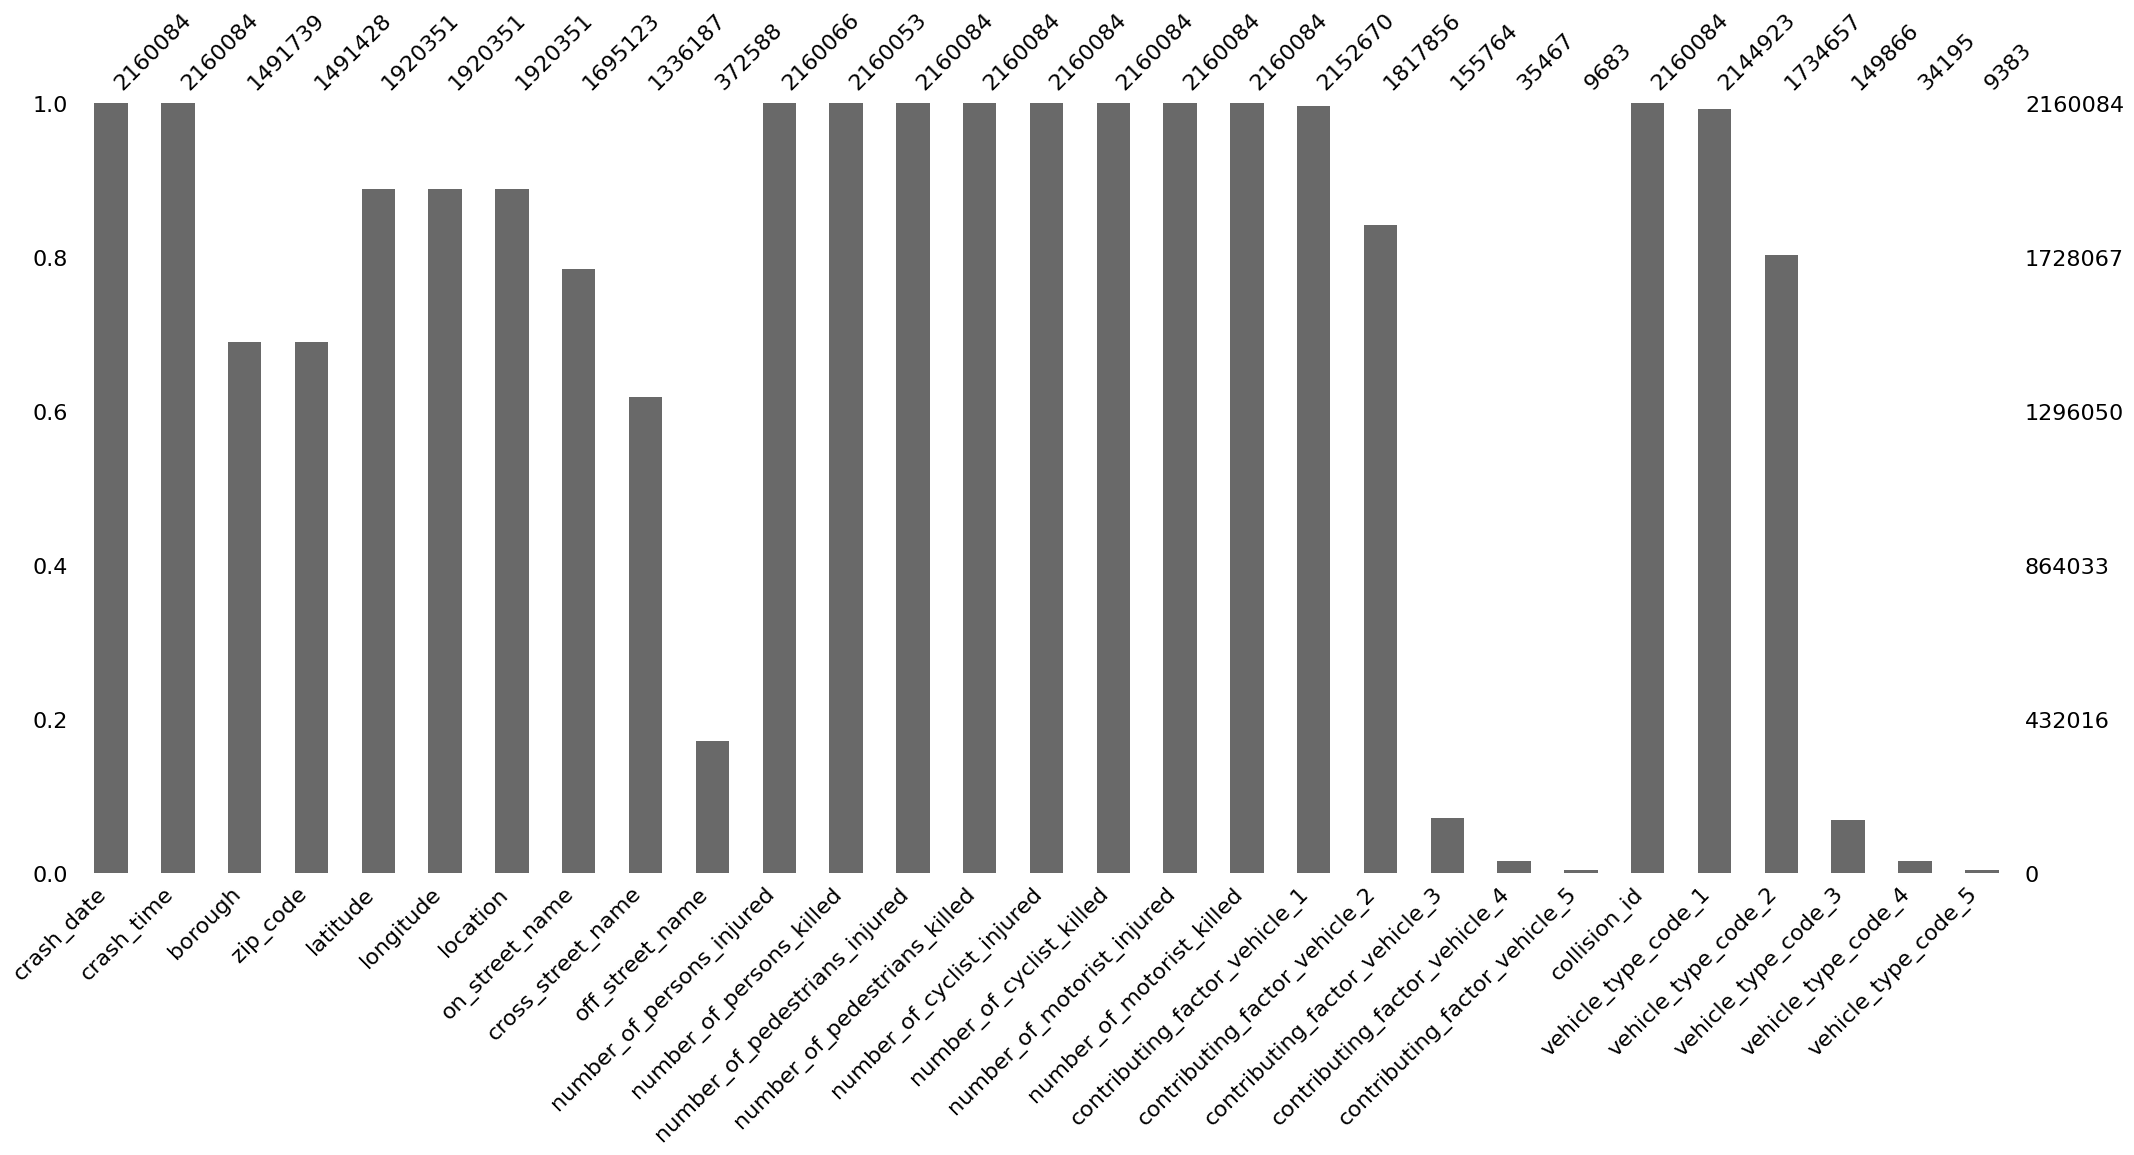

In [74]:
msno.bar(pdf)

<Axes: >

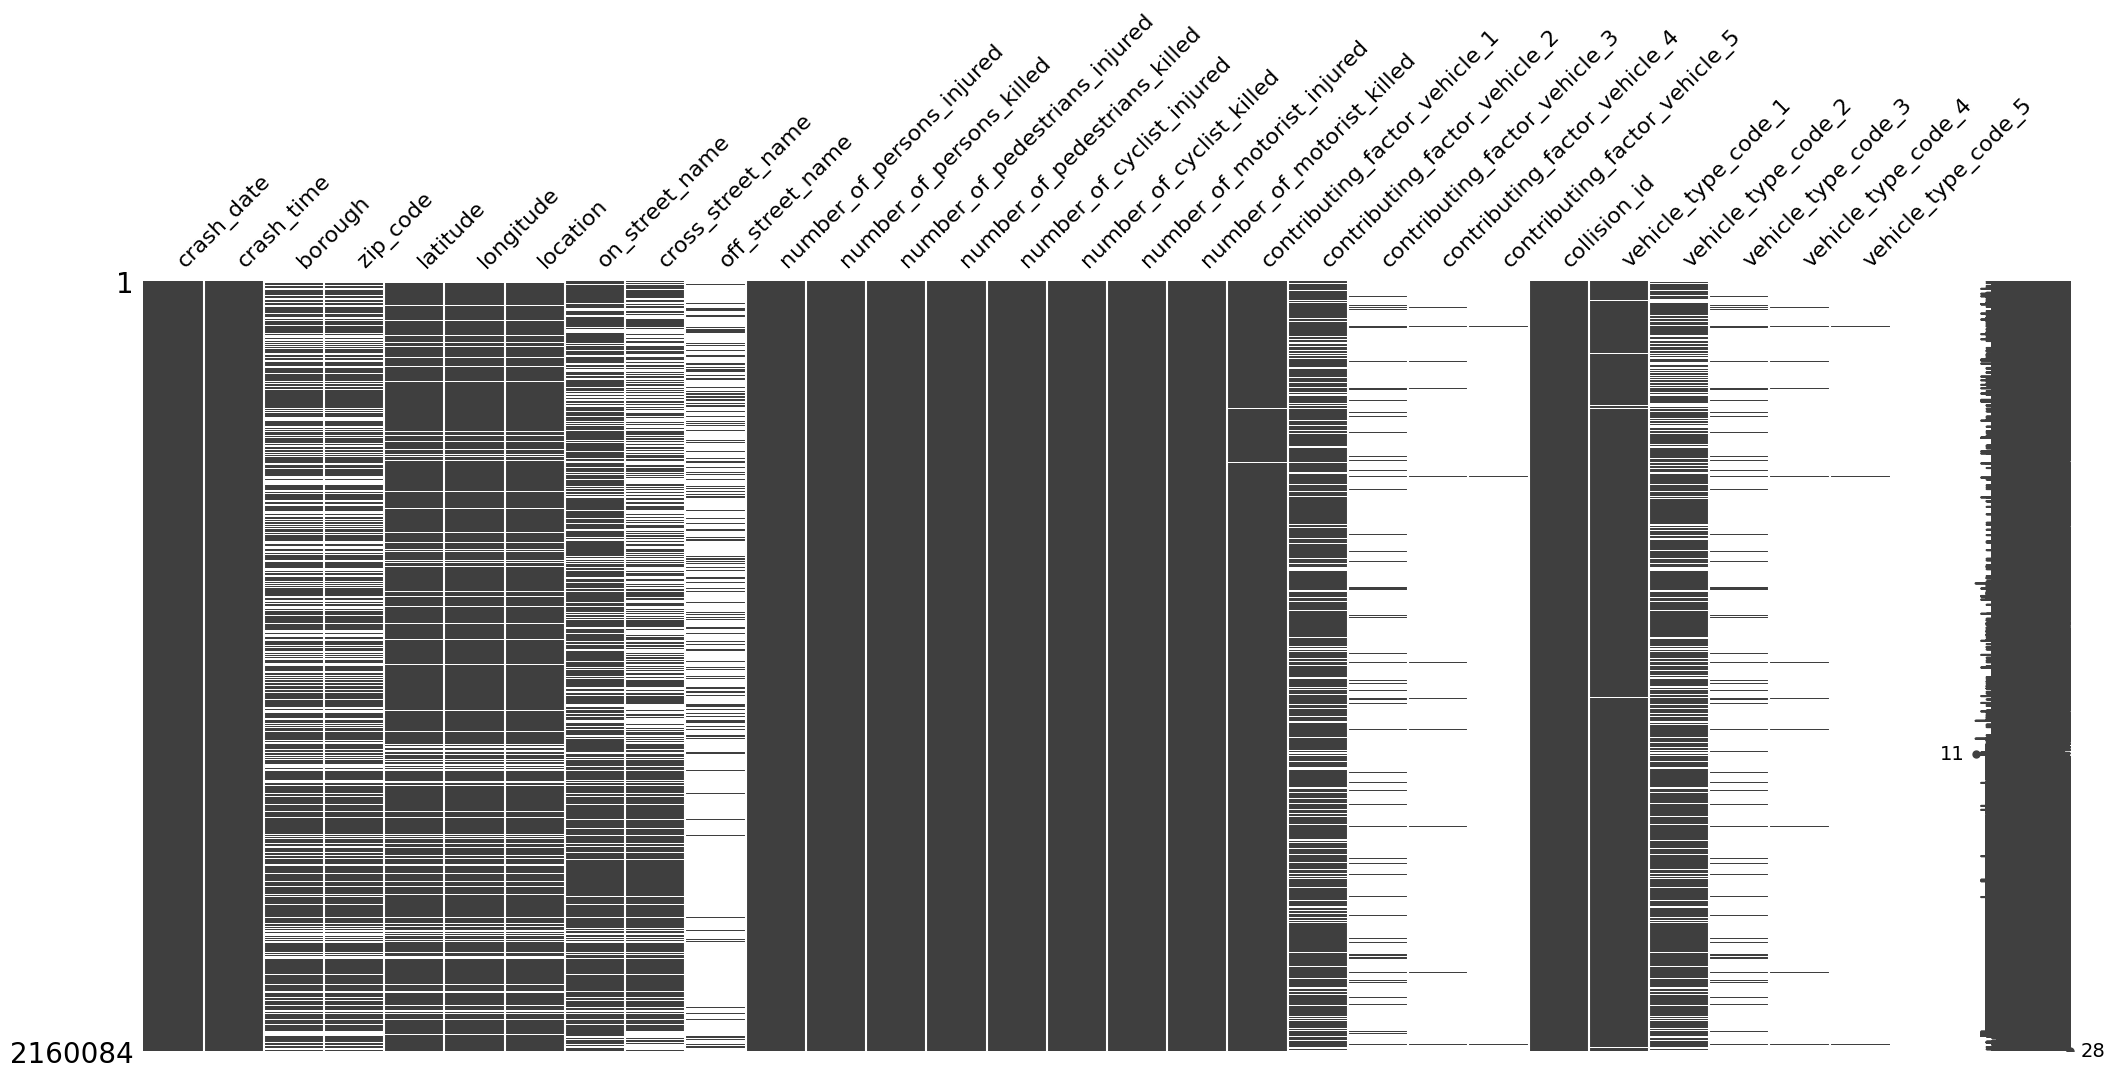

In [75]:
msno.matrix(pdf)

<Axes: >

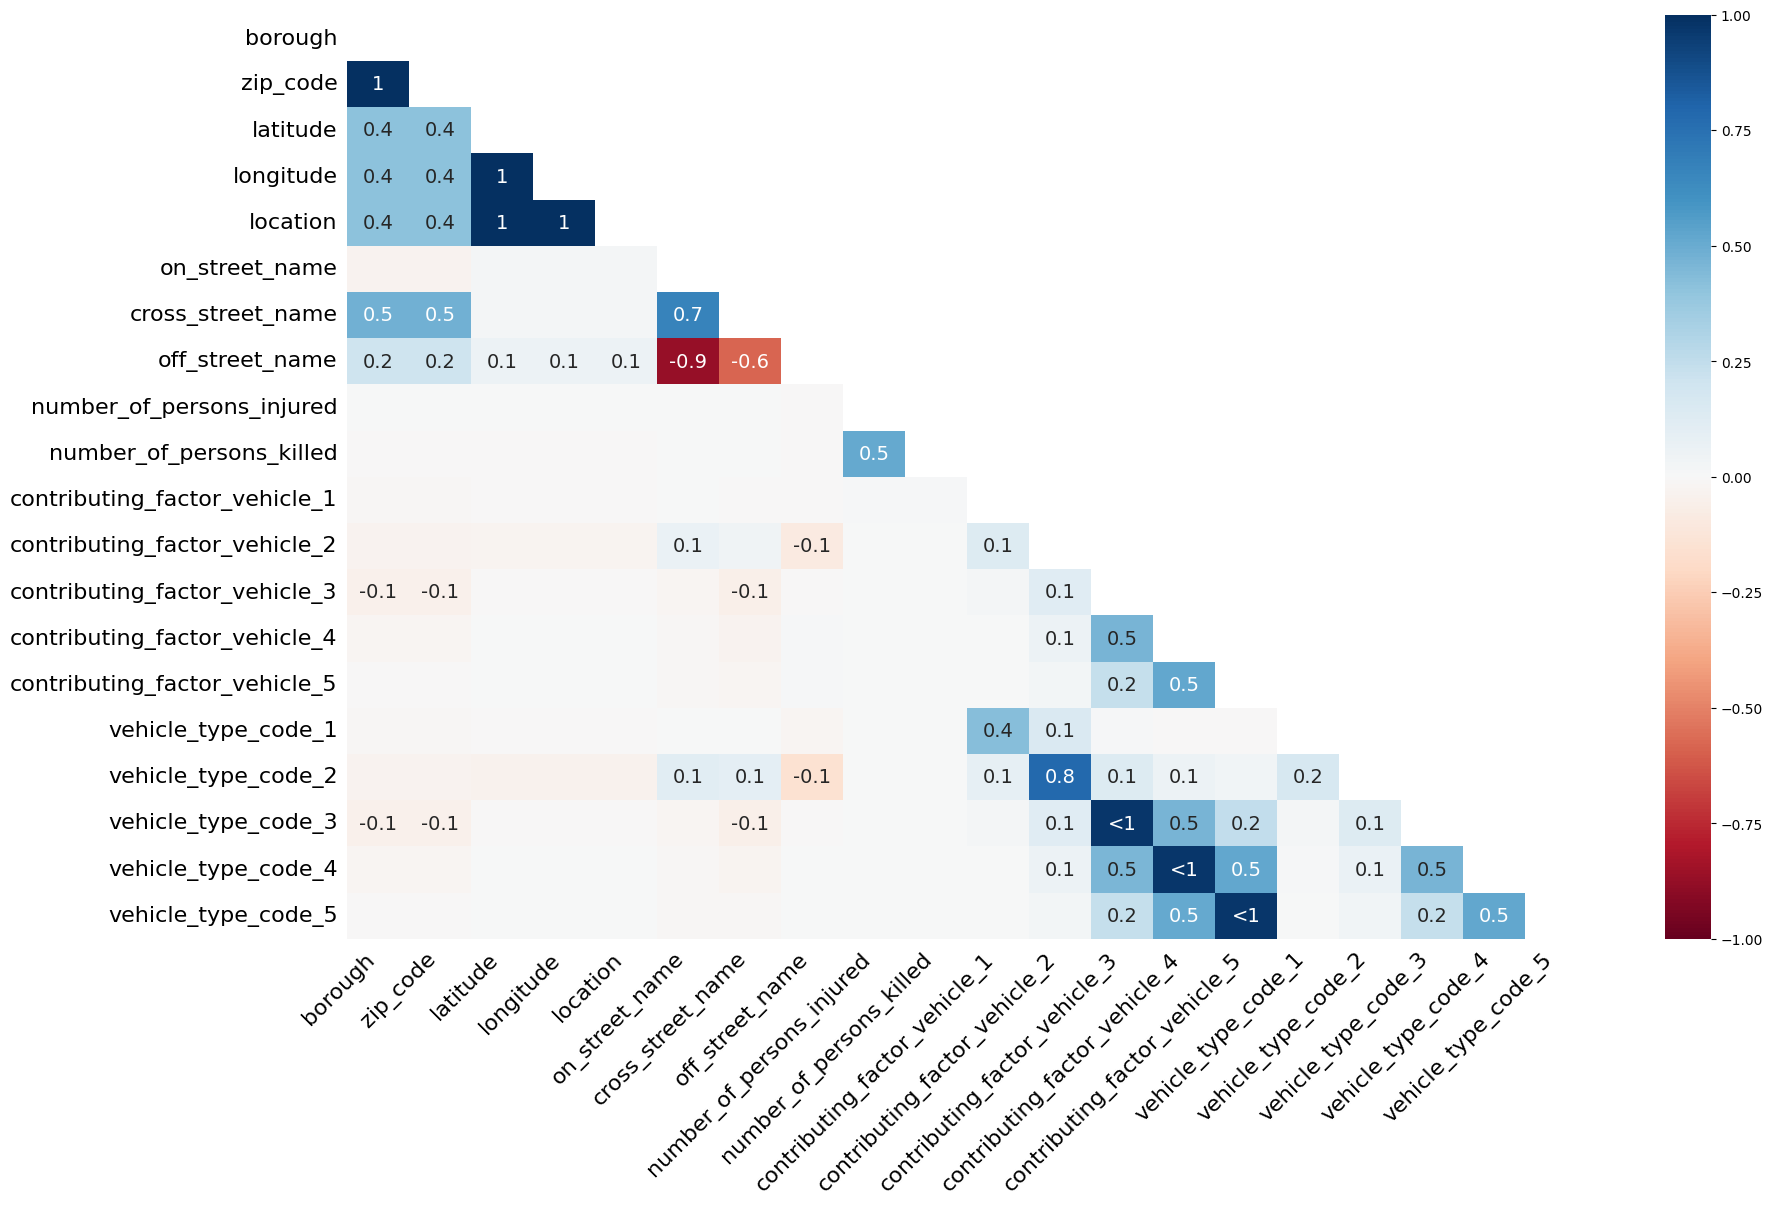

In [77]:
msno.heatmap(pdf)

<Axes: >

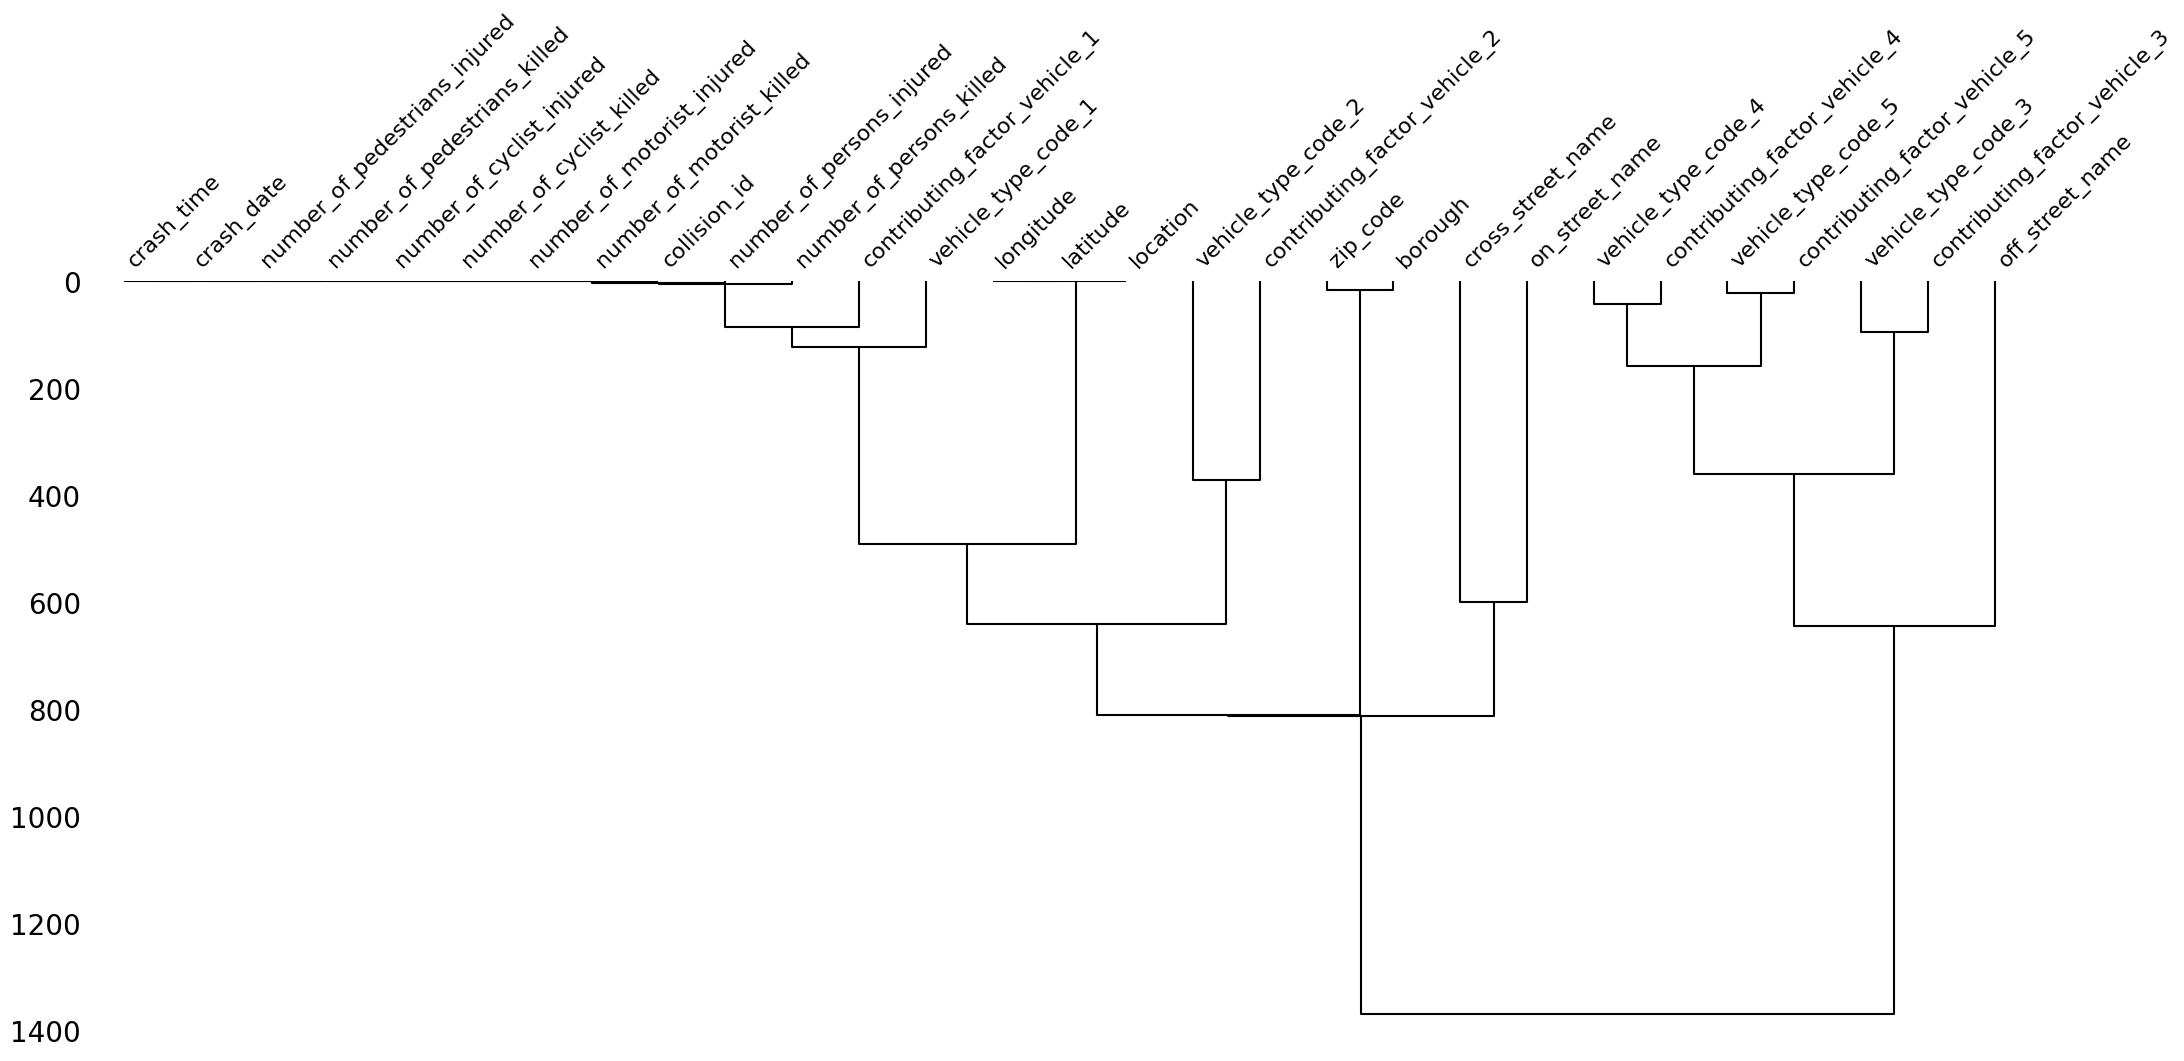

In [78]:
msno.dendrogram(pdf)

## 4. Data Preparation
**Goal:** Clean, transform, and structure the data for modeling.
- Handle missing values and duplicates
- Engineer new features if necessary
- Normalize, encode, or scale data as needed
- Data cleaning
- Feature engineering
- Data transformation

## 5. Modeling
**Goal:** Select and apply appropriate models.
- What models will be tested?
- Define the target variable and evaluation metrics.
- Train, tune, and compare models.
- Model selection
- Model building
- Model assessment

## 6. Evaluation
**Goal:** Assess model performance and business impact.
- Review model accuracy, precision, recall, etc.
- Compare results to business objectives.
- Identify any risks or limitations.
- Results evaluation
- Process review
- Next steps determination

## 7. Deployment
**Goal:** Implement the model in production.
- Deployment plan: How will the model be deployed (batch, API, etc.)?
- Monitoring and maintenance: What ongoing checks and updates are needed?
- Final project report: Document outcomes, lessons learned, and future improvements.